In [1]:
# pyrates imports
from pyrates.utility import plot_timeseries, grid_search

# additional imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.reload_library()
plt.style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 28
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 28
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['legend.fontsize'] = 20
from copy import deepcopy
from seaborn import cubehelix_palette

%matplotlib inline

In [15]:
# parameter definition
dt = 1e-4
T = 3.
C = np.array([68., 128., 135., 270., 675., 1350.])
inp = np.random.uniform(120., 320., (int(T/dt), 1))

params = {'c_pe': [], 'c_pi': [], 'c_ep': [], 'c_ip': []}
param_map = {'c_pe': {'var': [(None, 'weight')], 'edges': [('EIN.0', 'PC.0', 0)]},
             'c_pi': {'var': [(None, 'weight')], 'edges': [('IIN.0', 'PC.0', 0)]},
             'c_ep': {'var': [(None, 'weight')], 'edges': [('PC.0', 'EIN.0', 0)]},
             'c_ip': {'var': [(None, 'weight')], 'edges': [('PC.0', 'IIN.0', 0)]}}

for c in C:
    params['c_pe'].append(np.round(c, decimals=2))
    params['c_pi'].append(np.round(0.25 * c, decimals=2))
    params['c_ep'].append(np.round(0.8 * c, decimals=2))
    params['c_ip'].append(np.round(0.25 * c, decimals=2))

In [16]:
# pyrates simulation
results = grid_search(circuit_template="pyrates.examples.jansen_rit.simple_jr.JRC",
                      param_grid=params, param_map=param_map,
                      inputs={("PC", "RPO_e_pc.0", "u"): inp}, outputs={"v": ("PC", "PRO.0", "PSP")},
                      dt=dt, simulation_time=T, permute_grid=False, sampling_step_size=1e-3)

# rename columns
results.columns = [f'C = {c}' for c in C]

moving edge operators to nodes...
checking net config for consistency...
start of vectorization
...finished after 0.013749122619628906 seconds.


/nobackup/spanien1/rgast/anaconda3/envs/pyrates/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/nobackup/spanien1/rgast/PycharmProjects/PyRates/pyrates/utility/visualization.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['time'] = data.index


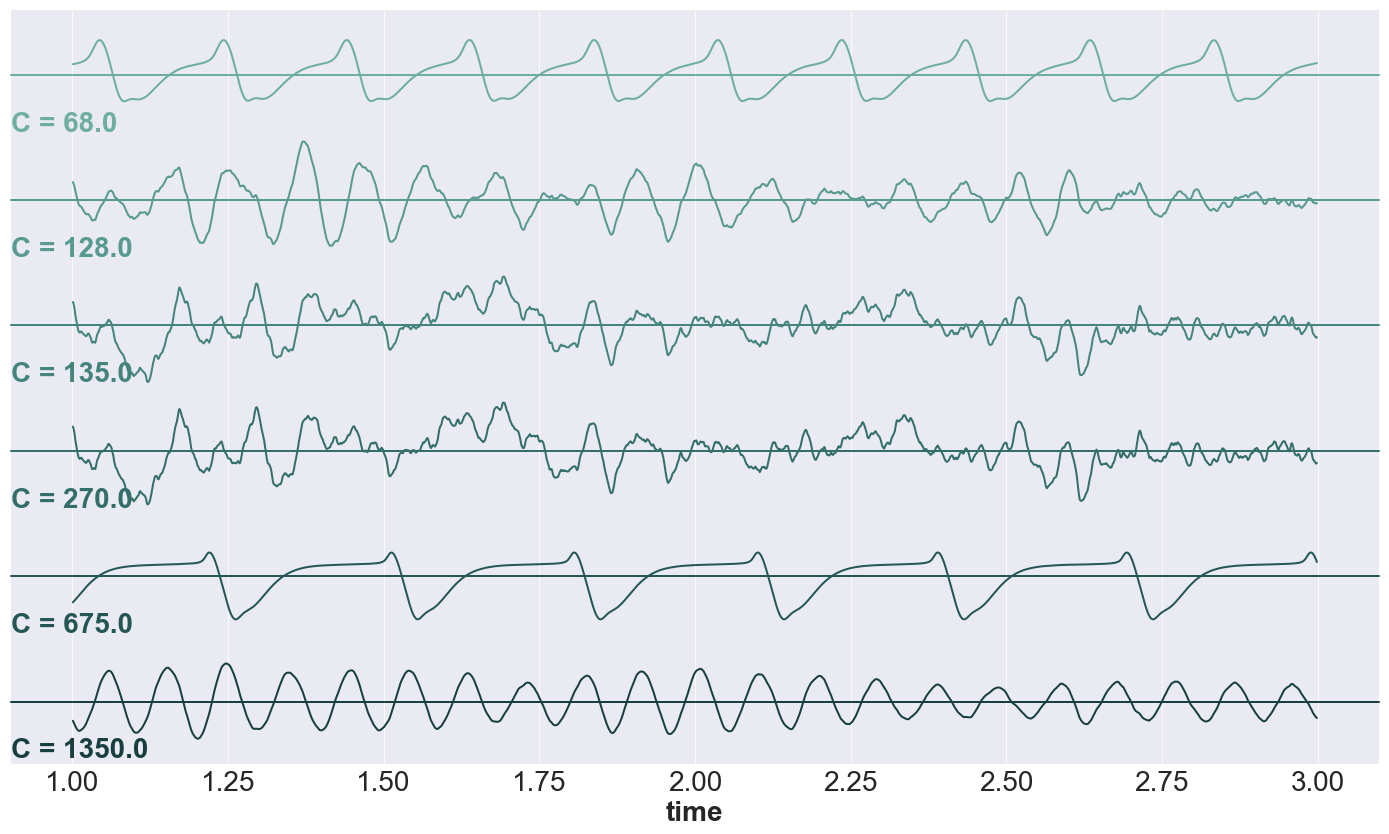

In [20]:
cm = cubehelix_palette(n_colors=len(C), start=2.5, rot=-0.1, light=0.6, dark=0.2)
ax = plot_timeseries(results.iloc[results.index > 1.0, :], plot_style='ridge_plot', demean=True, hspace=-.01,
                     fontsize=28, aspect=10, height=2.0, cmap=cm)
plt.savefig('PyRates_JansenRit_example_1.svg', format='svg')